In [1]:
import pandas as pd
import sqlite3

In [2]:
connect = sqlite3.connect('../data/checking-logs.sqlite')

In [3]:
pageviews_datetimes = pd.read_sql('''SELECT datetime
                                        FROM pageviews
                                        WHERE uid LIKE "user_%"''',
                                        connect,
                                        parse_dates=['datetime'])
pageviews_datetimes

,datetime
0,2020-04-17 22:46:26.785035
1,2020-04-18 10:53:52.623447
2,2020-04-18 10:56:55.833899
3,2020-04-18 10:57:37.331258
4,2020-04-18 12:05:48.200144
...,...
982,2020-05-21 18:45:20.441142
983,2020-05-21 23:03:06.457819
984,2020-05-21 23:23:49.995349
985,2020-05-22 11:30:18.368990


In [4]:
pageviews_datetimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  987 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.8 KB


In [5]:
pageviews_per_day = pageviews_datetimes.groupby(by=[pageviews_datetimes['datetime'].dt.date]).count()
pageviews_per_day.rename(columns={'datetime': 'views'}, inplace=True)
pageviews_per_day.head()

,views
datetime,
2020-04-17,1
2020-04-18,23
2020-04-19,15
2020-04-21,3
2020-04-22,1


In [6]:
pageviews_per_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 2020-04-17 to 2020-05-22
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   views   33 non-null     int64
dtypes: int64(1)
memory usage: 528.0+ bytes


<AxesSubplot:title={'center':'Views per day'}, xlabel='datetime'>

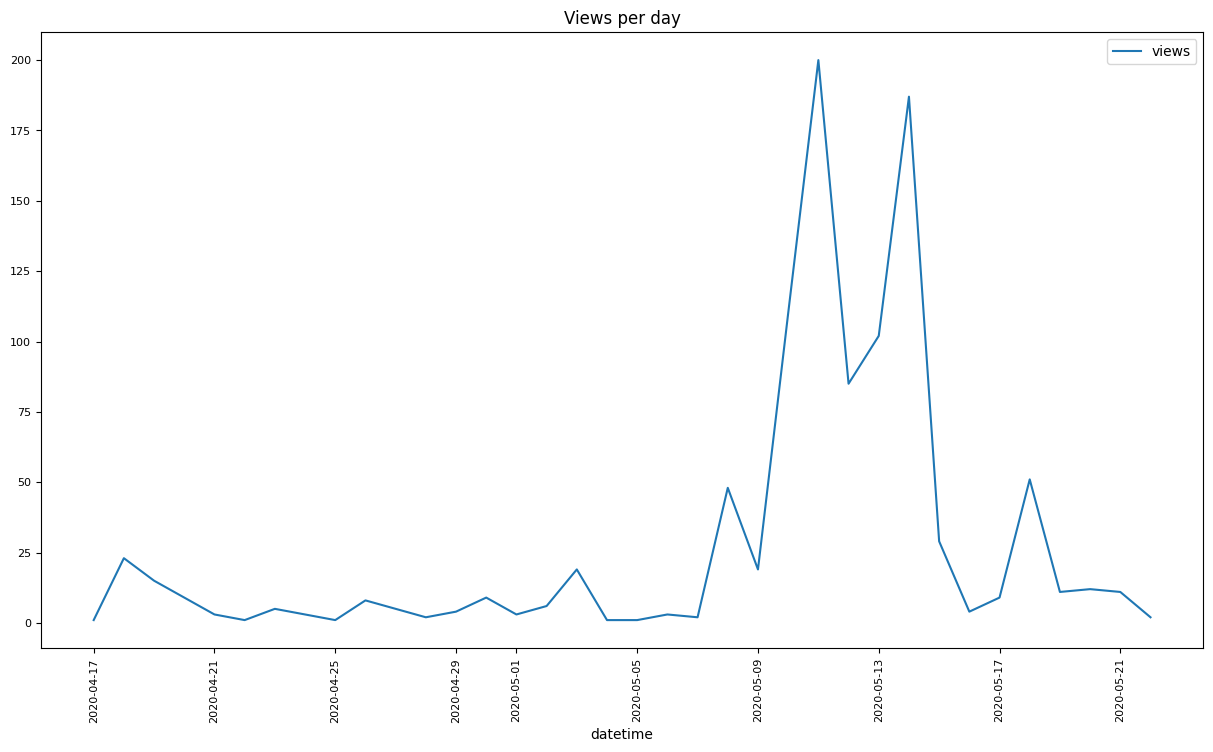

In [7]:
pageviews_per_day.plot(figsize=(15, 8),
                       fontsize=8,
                       title='Views per day',
                       rot=90)

In [8]:
connect.close()